In [1]:
'''
In this project we are going to perform Exploratory data analysis.
This EDA process is fundamental and essential before making a ML model.
This will give us an idea which variables to chose to be fed into the ML model
'''
#Select the path where the input files are kept
path = r'C:\Users\Sandipto\OneDrive\Udemy ML\Projects\Churn model'

In [2]:
#### Importing Libraries ####

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import os
import shutil

os.chdir(path)
try:
    os.mkdir(r'Pie_chart')
except:
    shutil.rmtree(r'Pie_chart')
    os.mkdir(r'Pie_chart')
dataset = pd.read_csv('churn_data.csv') # Users who were 60 days enrolled, churn in the next 30
try:
    os.mkdir(r'Bar_chart')
except:
    shutil.rmtree(r'Bar_chart')
    os.mkdir(r'Bar_chart')

In [3]:
#### starrting EDA ####
##Visualize some of the dataset columns
dataset.head(5) # Viewing the Data

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
##See all the column names
len(dataset.columns)

31

In [5]:
##Distribution of Numerical Variables
description = dataset.describe()
type(description)
description.to_csv('churn_data_descriptio.csv')
description

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [6]:
# Visualize NaN
dataset.isna().any()
#Note: This only gives us whether the columns contain NaN or not

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [7]:
#This is much helpful as its insights will help us in data cleaning process
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [ ]:
'''
From the above insight we see the following
age                           4
credit_score               8031
rewards_earned             3227
Given our length of dataset its best to do the following:
i) Drop the rows where age is nan. We have way more data than processing 4 records by imputer for the NaN age.
ii) Drop the columns credit_score and rewards_earned as NaN values are too high.
It means our client is not so much serious about these fields to be considered as metrics in our models
Hence we are dropping these columns off.
'''
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])
dataset = dataset.dropna(subset=['age'])

In [20]:
#get the unique values of housing column
unique_housing = np.array(dataset.loc[:,'housing'].unique())
print(unique_housing)

[2 1 0]


In [19]:
#labelencode categorical column
dataset['housing'] = dataset['housing'].astype('category')
dataset['housing'] = dataset['housing'].cat.codes

In [45]:
unique_payment_type = np.array(dataset.loc[:,'payment_type'].unique())
print(unique_payment_type)
dataset['payment_type'] = dataset['payment_type'].astype('category')
dataset['payment_type'] = dataset['payment_type'].cat.codes
unique_payment_type = np.array(dataset.loc[:,'payment_type'].unique())
print(unique_payment_type)

[0 3 2 4 1]
[0 3 2 4 1]


In [55]:
zodiac_sign = np.array(dataset.loc[:,'zodiac_sign'].unique())
print(zodiac_sign)
dataset['zodiac_sign'] = dataset['zodiac_sign'].astype('category')
dataset['zodiac_sign'] = dataset['zodiac_sign'].cat.codes
zodiac_sign = np.array(dataset.loc[:,'zodiac_sign'].unique())
print(zodiac_sign)

['Leo' 'Capricorn' 'Aries' 'Taurus' 'Cancer' 'Sagittarius' 'Aquarius'
 'Virgo' 'Libra' 'Gemini' 'Scorpio' 'Pisces' 'na']
[ 5  3  1 10  2  8  0 11  6  4  9  7 12]


In [57]:
i = 24

In [64]:
#view and save the bar charts
os.chdir(r'Bar_chart')
try:
    image_name = str(dataset.columns.values[i - 1]) + r'.jpg'
    plt.suptitle('Histograms of Numerical Columns', fontsize=20)
    f = plt.gca()
    f.set_title(dataset.columns.values[i - 1])
    vals = np.size(dataset.iloc[:, i - 1].unique())
    plt.hist(dataset.iloc[:, i - 1], bins=vals, color='#3F5D7D')
    plt.savefig(image_name)
    i += 1
except Exception as e:
    print(e)
    print("Please check the output images in folder Bar_chart " + image_name + " " + str(i))
    i += 1
os.chdir('..')

index 29 is out of bounds for axis 0 with size 29
Please check the output images in folder Bar_chart is_referred.jpg 30


In [68]:
## Pie Plots
#we are using the pie plots to explore the classification columns distrubution
#like how many % of people are android_user etc.
os.chdir(path)
dataset = pd.read_csv('churn_data.csv')
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
print(dataset2.shape)
os.chdir(r'Pie_chart')
i = 1

(27000, 17)


In [86]:
#view and save the pie charts
#for i in range (1, dataset2.shape[1]+1):
try:
    image_name = str(dataset2.columns.values[i - 1]) + r'.jpg'
    plt.suptitle(dataset2.columns.values[i - 1], fontsize=20)
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')#don't show x y labels
    plt.savefig(image_name)
    i += 1
except:
    print("Please check the output images in folder Pie_chart")

Please check the output images in folder Pie_chart


(-1.1005521543743757,
 1.1000262933130402,
 -1.1008349470281675,
 1.1003173834732132)

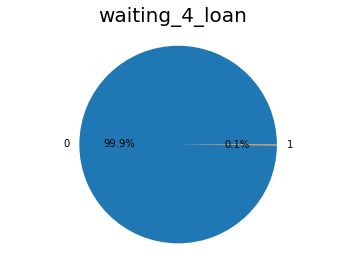

In [12]:
##Get back to the parent directory
os.chdir('..')
'''
now we have the pie charts there is a column waiting_4_loan which has a very odd distribution
99.9% are with 0 and 0.1% with 1. We don't see a balanced distribution for both churn = 0
and churn = 1. Thus this may cause a bias in the model.
thus we go to Exploring Uneven Features
'''
plt.suptitle('waiting_4_loan', fontsize=20)
values = dataset2.loc[:, 'waiting_4_loan'].value_counts(normalize = True).values
index = dataset2.loc[:, 'waiting_4_loan'].value_counts(normalize = True).index
plt.pie(values, labels = index, autopct='%1.1f%%')
plt.axis('equal')#don't show x y labels

In [87]:
'''
Exploring Uneven Features
here we are trying to find  in dataset for the records where waiting_4_loan = 1
what is the distribution of churn variable
we see the output as follows:
0    27 for churn value = 0 there are 27 records with waiting_4_loan= 1
1     8 for churn value = 1 there are 8 records with waiting_4_loan= 1
this is done to check whether there is any fishy value like all are 1 or 0.
the fishy records if fed into ML model will create a bias. Here there will be little or no bias. So we don't need to exclude them
'''
print("waiting_4_loan:\n" + str(dataset[dataset2.waiting_4_loan == 1].churn.value_counts()))
print("cancelled_loan:\n" + str(dataset[dataset2.cancelled_loan == 1].churn.value_counts()))
print("received_loan:\n" + str(dataset[dataset2.received_loan == 1].churn.value_counts()))
print("rejected_loan:\n" + str(dataset[dataset2.rejected_loan == 1].churn.value_counts()))
print("left_for_one_loan:\n" + str(dataset[dataset2.left_for_one_month == 1].churn.value_counts()))


waiting_4_loan:
0    27
1     8
Name: churn, dtype: int64
cancelled_loan:
1    274
0    234
Name: churn, dtype: int64
received_loan:
1    292
0    199
Name: churn, dtype: int64
rejected_loan:
1    107
0     25
Name: churn, dtype: int64
left_for_one_loan:
1    266
0    222
Name: churn, dtype: int64


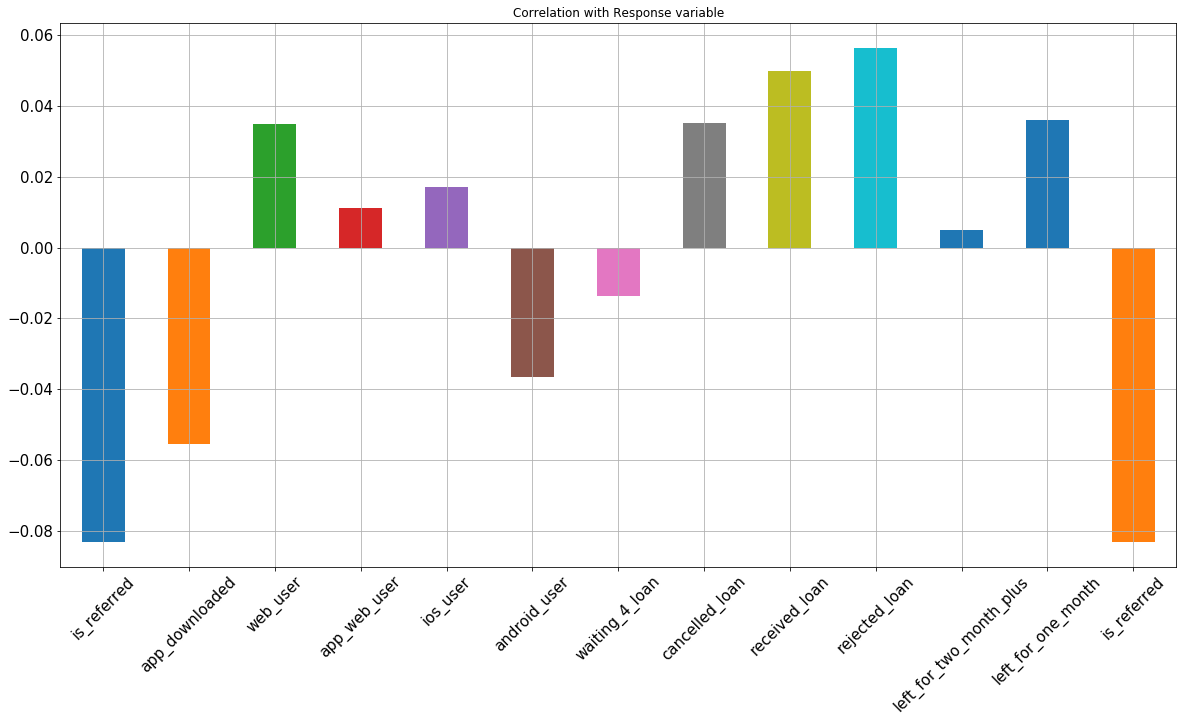

In [14]:
## Correlation with Response Variable
#remove categorical columns
dataset2.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign']
    ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)


'\nIn the correlation matrix we can see there is a strong negative correlation\nbetween android user and ios user. This totally makes sense.\nIn general if you are android user its least likely you buy ios.\nThe correlation is not 1 because there can be some people who bought\nboth IOS and android. There are some people who use a different on altogether\n\nAlso in the dataset if we observe carefully we can see that app_web_user is \n1 only when both app_downloaded and web_user are both 1.\nThus app_web_user is a f(app_downloaded, web_user). Thus we are removing it.\nThis prevents highly correlated variables to enter into ML algorithms.\nML algorithms work best with independent variables\n'

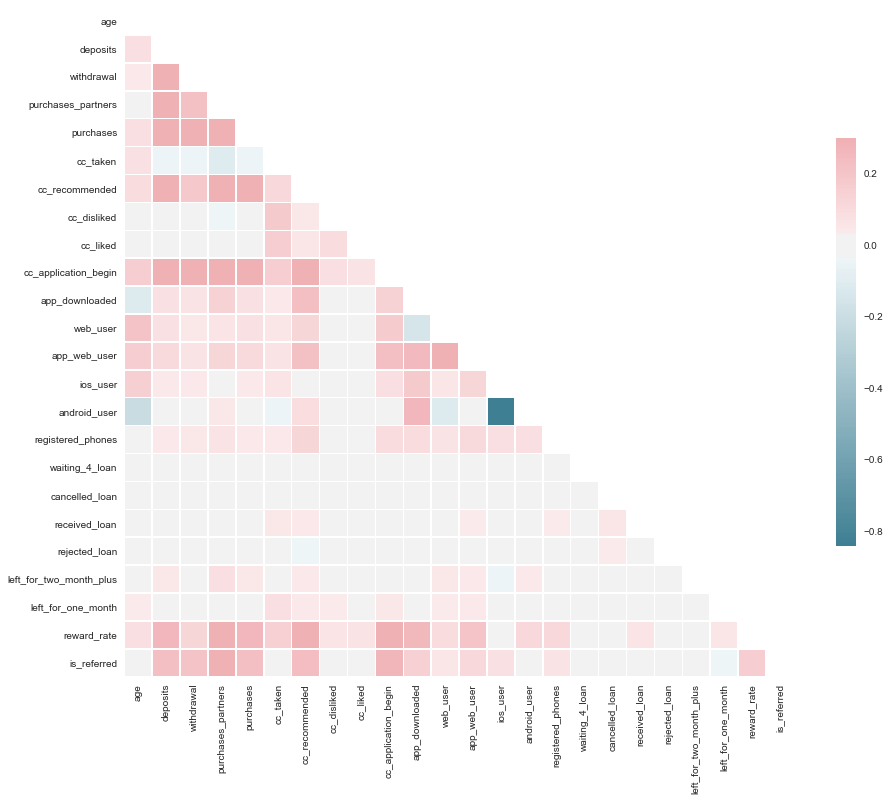

In [15]:
## Correlation Matrix
sn.set(style="white",font_scale = 1)

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            )

'''
In the correlation matrix we can see there is a strong negative correlation
between android user and ios user. This totally makes sense.
In general if you are android user its least likely you buy ios.
The correlation is not 1 because there can be some people who bought
both IOS and android. There are some people who use a different on altogether

Also in the dataset if we observe carefully we can see that app_web_user is 
1 only when both app_downloaded and web_user are both 1.
Thus app_web_user is a f(app_downloaded, web_user). Thus we are removing it.
This prevents highly correlated variables to enter into ML algorithms.
ML algorithms work best with independent variables
'''


In [16]:
#Visualize correlation matrix
corr

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
age,1.000000,0.088757,0.044177,-0.000943,0.088769,0.077199,0.095860,0.005577,0.019512,0.164872,...,-0.210068,-0.001354,0.004164,-0.003713,-0.001808,0.011030,-0.022500,0.034534,0.086167,-0.001557
deposits,0.088757,1.000000,0.488902,0.326588,0.998554,-0.047058,0.376123,-0.014680,-0.012111,0.452493,...,-0.002171,0.040044,-0.002928,0.011381,-0.009439,-0.018501,0.048370,-0.011354,0.267635,0.229957
withdrawal,0.044177,0.488902,1.000000,0.223692,0.488285,-0.040658,0.187423,-0.011105,-0.003197,0.295733,...,-0.004248,0.047112,0.003173,-0.002577,-0.006240,-0.009826,0.032079,-0.009968,0.125363,0.211614
purchases_partners,-0.000943,0.326588,0.223692,1.000000,0.326529,-0.101511,0.594491,-0.035335,-0.033016,0.411316,...,0.048343,0.072166,0.000089,0.014012,-0.015040,-0.030989,0.082333,-0.032074,0.432839,0.301542
purchases,0.088769,0.998554,0.488285,0.326529,1.000000,-0.047082,0.376666,-0.014583,-0.012194,0.453160,...,-0.001371,0.039667,-0.002712,0.011687,-0.009273,-0.018337,0.048654,-0.011511,0.268124,0.230099
cc_taken,0.077199,-0.047058,-0.040658,-0.101511,-0.047082,1.000000,0.115100,0.182655,0.168530,0.165640,...,-0.044865,0.042719,-0.006079,0.004685,0.046760,0.006387,-0.016006,0.085823,0.149156,-0.025004
cc_recommended,0.095860,0.376123,0.187423,0.594491,0.376666,0.115100,1.000000,0.048076,0.055571,0.611520,...,0.093413,0.125966,-0.018087,0.014188,0.044977,-0.037966,0.045625,0.037735,0.877549,0.241626
cc_disliked,0.005577,-0.014680,-0.011105,-0.035335,-0.014583,0.182655,0.048076,1.000000,0.095500,0.083475,...,0.005893,0.025728,-0.002094,0.011349,0.014676,-0.002854,-0.012925,0.033594,0.060708,-0.009285
cc_liked,0.019512,-0.012111,-0.003197,-0.033016,-0.012194,0.168530,0.055571,0.095500,1.000000,0.068826,...,-0.005965,0.025381,-0.001984,0.002677,0.021603,-0.001630,-0.007150,0.007706,0.064473,-0.012215
cc_application_begin,0.164872,0.452493,0.295733,0.411316,0.453160,0.165640,0.611520,0.083475,0.068826,1.000000,...,-0.009366,0.101539,-0.001645,0.008788,0.029661,-0.021088,0.031599,0.047561,0.512871,0.272574


In [39]:
# Removing Correlated Fields app_web_user and also IOS user
dataset = dataset.drop(columns = ['app_web_user','ios_user'])

## Note: Although there are somewhat correlated fields, they are not colinear
## These feature are not functions of each other, so they won't break the model
## But these feature won't help much either. Feature Selection should remove them.

dataset.to_csv('new_churn_data.csv', index = False)